<a href="https://colab.research.google.com/github/mbn75/udemy_python_0_hero_capstone/blob/main/Capstone_Project_Hangman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the development of a word guessing game... **Word of the Day Hangman**!  Avoid making six wrong guesses of either letters or words and keep your stick figure "alive" in order to win.  Don't let your stick figure meet a terrible fate!

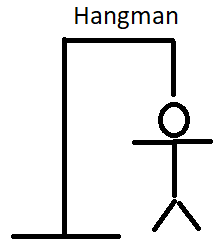

Objectives:


*   Use Web scrapping to select the "word of the day" from an online dictionary website
*   Using functions or class objects and user interface for playing the game.  Play ends when player guess the word correctly, guesses all the letters correctly or play makes six wrong guesses in the game.
*   Create a graphical interface to display correct and incorrect guesses and the stick figure





# **Library Imports**

In [27]:
#Import libraries

#web scrapping
import requests, bs4, lxml

#regular expressions
import re

#random integer
import random

#Import pillow and operating system libraries
from PIL import Image
import os

#clear output
from google.colab import output



from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from IPython.display import display

# **Site requests and soup making**

In [28]:
#Make site requests
dictionary_dot_com = requests.get('https://www.dictionary.com/e/word-of-the-day/')
#merriam_webster = requests.get('https://www.merriam-webster.com/word-of-the-day')
#collins = requests.get('https://www.collinsdictionary.com/dictionary/english')

#Make soups
dict_soup = bs4.BeautifulSoup(dictionary_dot_com.text, 'lxml') #Dictionary.com soup
#m_w_soup = bs4.BeautifulSoup(merriam_webster.text, 'lxml') #Merriam-Webster.com soup
#coll_soup = bs4.BeautifulSoup(collins.text, 'lxml') #CollinsDistionary.com soup

# **Getting word, word type, and definition from Dictionary.com soup**

In [29]:
#Get word.  Distionary.com word pattern is: "Word of the Day - <the_word> | Dictionary.com".  
#This can be found in the soup using the 'title' tag at the beginning of the list object

word_pattern = '([^Word of the Day - ](\S+))' #This regular expression picks out <the_word> from the string by excluding phrase "Word of the Day - " using the ^ (hat) operator

text = dict_soup.select('title')[0].getText()
word_spelling = re.search(word_pattern, text).group()
#word_spelling

In [30]:
#Get word type.  Cleaning up the string is not as critical since it will not affect game play.
type_pattern = '\S+' #straight forward regular expression.  Using "S" and "+" to get alpha no whitespace

text = dict_soup.select('p')[2].getText()
word_type = re.search(type_pattern, text).group()
#word_type

In [31]:
#Get definition. Cleaning up the string is not as critical since it will not affect game play.
word_defition = dict_soup.select('p')[3].getText() #Just get the text without use of regular expression
#word_defition

In [32]:
#Create a dictionary for Dictionary.com word of the day
dict_dict = {'spelling':word_spelling, 'type':word_type, 'definition':word_defition}
#dict_dict

# **Not Used: Getting word, word type, and defintion from Merriam-Webster.com soup**

In [ ]:
#Upon further testing m_w_dictionary site is more difficult to scrape.  Will need to troubleshoot later if I still have desire.

In [ ]:
#merriam-webster.com word pattern is: "Word of the Day: <the_word> | Merriam-Webster".  This can be found in the soup using the 'title' tag at the beginning of the list object

#word_pattern = '([^Word of the Day: ](\S+))' #This regular expression picks out <the_word> from the string by excluding phrase "Word of the Day: " using the ^ (hat) operator
#text = m_w_soup.select('title')[0].getText()
#word = re.search(word_pattern, text).group()
#word

In [ ]:
#Finding the word in the list
"""
for i in range(len(m_w_soup.select('span'))):
  print(str(i) + " " + m_w_soup.select('span')[i].getText())
"""
#word_type = m_w_soup.select('span')[14].getText()
#word_type

'\nfor i in range(len(m_w_soup.select(\'span\'))):\n  print(str(i) + " " + m_w_soup.select(\'span\')[i].getText())\n'

In [ ]:
#text = m_w_soup.select('p')[0].getText()
#word_def = re.search('[^: ](\S+)', text).group()
#word_def

In [ ]:
#Create a dictionary for Merriam-Webster.com word of the day
#m_w_dict = {'word':word, 'type':word_type, 'definition':word_def}
#m_w_dict

# **NOT USED: Randomly select a dictionary word of the day for use for hangman**

In [ ]:
#Not needed.  Only using Dictionary.com scrape
'''
if random.randint(0,1) == 1:
  hangman_dict = dict_dict
else:
  hangman_dict = m_w_dict
#hangman_dict
'''

'\nif random.randint(0,1) == 1:\n  hangman_dict = dict_dict\nelse:\n  hangman_dict = m_w_dict\n#hangman_dict\n'

# **Hangman word class**

In [33]:
class HangmanWord():
  '''
  HangmanWord class 
  - attributes: spelling, word_type, definition all of string type
  - methods: self, guess

  '''
  
  def __init__(self, spelling='', word_type='', definition=''):
    #Class Attributes
    self.spelling = spelling
    self.word_type = word_type
    self.definition = definition
    self.word_list = [char for char in spelling] #list comprehension
    self.guessing_list = ['-' if x in ['-'] else ' ' for x in spelling] #list comprehension
    self.alpha_set = set([chr(x) for x in range(ord('a'),ord('z')+1)]) #list comprehension cast to set()
    self.guessed_letter = set()

  #self.print method
  def __str__(self):
    return f"The Word of the Day is: '{self.spelling}'\nIt is a {self.word_type}.\nThe definition is: '{self.definition}''"

  #self.lenth method
  def __len__(self):
    return len(self.spelling)

  #guessing method
  def guess(self,letter=''):
    try:
      if len(letter) == 1 or len(letter) == len(self.spelling): #Only accepts single or full word guesses
        start = 0 #Starting position for index loop.  Needed to find all instances of same letter in a word
        for char in self.word_list:
          if letter == char:
            self.guessing_list[self.word_list.index(char, start)] = letter
          elif letter == self.spelling:
            print('You guesses correctly.  You win!')
            self.guessing_list = self.word_list
            break
          else:
            pass
          start = start + 1
        self.alpha_set.discard(letter.lower())
        self.guessed_letter.add(letter.lower())
        return (letter.lower(), letter.lower() in self.spelling.lower())
      else:
        return 'Single letter or whole word guessess only. Partial word guesses not allowed.'
    except:
      return 'This method only accepts string arguements.  Please enter your argument as a string.'

# **Game visual display function**

In [34]:
#Game play display function
def hangman_display(num=0):
  '''
  The hangman display function accepts one arguement, integer in the range [0:6]
  If values in range then uses if-then logic to display hangman
  If argument not in range then prints a statement about error
  '''
  #make sure the current working directory is set
  os.chdir('/content/drive/MyDrive/Colab Notebooks/udemy_python_0_hero_capstone')
  #print(os.getcwd())
  #output.clear()
  try:
    if num == 0:
      print('No wrong guesses')
      print('\nYour word:')
      print(game_word.guessing_list)
      print("\nYou've used the following guesses:")
      print(game_word.guessed_letter)
      print("\nThese are the letters you've yet to try.")
      print(game_word.alpha_set)
      hangman_pic = Image.open('0_zero.PNG') #Mounted Google Drive to colab notebook
    elif num == 1:
      print('One wrong guess')
      print('\nYour word:')
      print(game_word.guessing_list)
      print("\nYou've used the following guesses:")
      print(game_word.guessed_letter)
      print("\nThese are the letters you've yet to try.")
      print(game_word.alpha_set)
      hangman_pic = Image.open('1_one.PNG')
    elif num == 2:
      print('Two wrong guesses')
      print('\nYour word:')
      print(game_word.guessing_list)
      print("\nYou've used the following guesses:")
      print(game_word.guessed_letter)
      print("\nThese are the letters you've yet to try.")
      print(game_word.alpha_set)
      hangman_pic = Image.open('2_two.PNG')
    elif num == 3:
      print('Three wrong guesses')
      print('\nYour word:')
      print(game_word.guessing_list)
      print("\nYou've used the following guesses:")
      print(game_word.guessed_letter)
      print("\nThese are the letters you've yet to try.")
      print(game_word.alpha_set)
      hangman_pic = Image.open('3_three.PNG')
    elif num == 4:
      print('Four wrong guesses')
      print('\nYour word:')
      print(game_word.guessing_list)
      print("\nYou've used the following guesses:")
      print(game_word.guessed_letter)
      print("\nThese are the letters you've yet to try.")
      print(game_word.alpha_set)
      hangman_pic = Image.open('4_four.PNG')
    elif num == 5:
      print('Five wrong guesses')
      print('\nYour word:')
      print(game_word.guessing_list)
      print("\nYou've used the following guesses:")
      print(game_word.guessed_letter)
      print("\nThese are the letters you've yet to try.")
      print(game_word.alpha_set)
      hangman_pic = Image.open('5_five.PNG')
    elif num == 6:
      print('Six wrong guesses. Game Over!')
      print('\n')
      print(game_word)
      hangman_pic = Image.open('6_six.PNG')
    else:
      pass
    return hangman_pic
  except:
    print('Error! This function only accepts integer values in the range [0:6].')

No wrong guesses

Your word:
[' ', ' ', ' ', ' ', ' ']

You've used the following guesses:
set()

These are the letters you've yet to try.
{'p', 'z', 'v', 'j', 'c', 'w', 'x', 'a', 'y', 'n', 'f', 'k', 'o', 'g', 'u', 'b', 'l', 'r', 't', 'i', 'e', 'q', 'm', 'h', 's', 'd'}


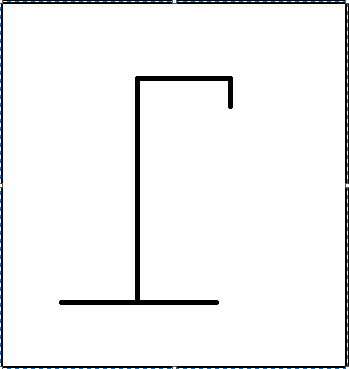

In [36]:
#Game display function testing
game_word = HangmanWord(spelling=dict_dict['spelling']
                        ,word_type=dict_dict['type']
                        ,definition=dict_dict['definition'])
hangman_display()

# **Game Play Logic**

In [37]:
guess_count = 0
game_word = HangmanWord(spelling=dict_dict['spelling']
                        ,word_type=dict_dict['type']
                        ,definition=dict_dict['definition'])

while guess_count < 6:

  if len(game_word.guessed_letter) == 0:
    print("Welcome to Word of the Day Hangman!")
    print(f"The word has {len(game_word)} letters.\n")
  if game_word.guessing_list == game_word.word_list:
    output.clear()
    print('You win!')
    print(game_word)
    hangman_display(guess_count)
    break
  test = game_word.guess(input('make a guess: '))
  if not test[1]:
    guess_count = guess_count + 1
    output.clear()
    print('Sorry! Wrong guess. Try again.')
  else:
    output.clear()
    print('Correct! Good guess')
  hangman_display(guess_count)

You win!
The Word of the Day is: 'istic'
It is a adjective.
The definition is: 'indefinite; indeterminate.''
Three wrong guesses

Your word:
['i', 's', 't', 'i', 'c']

You've used the following guesses:
{'e', 'a', 'l', 's', 'c', 'i', 't'}

These are the letters you've yet to try.
{'p', 'z', 'v', 'j', 'w', 'x', 'y', 'n', 'f', 'k', 'o', 'g', 'u', 'b', 'r', 'q', 'm', 'h', 'd'}


In [12]:
#practice function
def basic_slider(x):
  return x

In [15]:
interact(basic_slider,x='')

interactive(children=(Text(value='', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.basic_slider>

In [19]:
@interact(x=True,y=fixed(10))
def g(x,y):
  return(x,y)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [22]:


def f(a,b):
  display(a+b)
  return a+b

In [23]:
w = interactive(f,a=10,b=20)

In [24]:
type(w)

ipywidgets.widgets.interaction.interactive

In [25]:
w.children

(IntSlider(value=10, description='a', max=30, min=-10),
 IntSlider(value=20, description='b', max=60, min=-20),
 Output())

In [26]:
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…